# Pre-Analysis of the audios files

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import pandas as pd
from utils.format_helpers import analyze_audio_files, extract_id

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Raw Audio Analysis (Meditation)

In [45]:
directories = ["../data/OBE1","../data/OBE2","../data/Compassion"]
extensions = ["m4a","wav","mp4"]

df = analyze_audio_files(directories, extensions)

# Sort by alphabetical order of experiment names
df = df.sort_values(by="Experiment", ascending=True)
df.to_csv("outputs/audio_data.csv", index=False)
df

,File Name,Format,Id,Duration,Duration_timedelta,Duration_sec,Experiment
81,S313,.m4a,313,00:09:36,0 days 00:09:36.620000,576.62,Compassion
79,S306,.m4a,306,00:08:50,0 days 00:08:50.710000,530.71,Compassion
78,S305con,.m4a,305,00:01:41,0 days 00:01:41.100000,101.10,Compassion
77,S304,.m4a,304,00:07:05,0 days 00:07:05.920000,425.92,Compassion
76,S303man,.m4a,303,00:04:34,0 days 00:04:34.920000,274.92,Compassion
...,...,...,...,...,...,...,...
44,S212_2,.m4a,212,00:07:54,0 days 00:07:54.580000,474.58,OBE2
45,S213_1,.m4a,213,00:02:12,0 days 00:02:12.950000,132.95,OBE2
46,S213_2,.m4a,213,00:04:25,0 days 00:04:25.090000,265.09,OBE2
32,S208-2,.m4a,208,00:06:30,0 days 00:06:30.590000,390.59,OBE2


In [46]:
# Group by 'Experiment' and sum durations
print(df.groupby('Experiment')['Duration_timedelta'].sum())
print(df['Duration_timedelta'].sum())

Experiment
Compassion   0 days 01:00:53.870000
OBE1         0 days 01:22:57.510000
OBE2         0 days 04:55:58.040000
Name: Duration_timedelta, dtype: timedelta64[ns]
0 days 07:19:49.420000


In [58]:
# Create a mapping of Filename to Experiment
df_conditon = pd.read_csv('./outputs/overview_interviews.csv')
filename_to_condition = dict(zip(df_conditon['File Name'],df_conditon['Condition']))

df = pd.read_csv("outputs/audio_data.csv")
df['Condition'] = df['File Name'].map(filename_to_condition)
df

,File Name,Format,Id,Duration,Duration_timedelta,Duration_sec,Experiment,Condition
0,S313,.m4a,313,00:09:36,0 days 00:09:36.620000,576.62,Compassion,1
1,S306,.m4a,306,00:08:50,0 days 00:08:50.710000,530.71,Compassion,1
2,S305con,.m4a,305,00:01:41,0 days 00:01:41.100000,101.10,Compassion,C
3,S304,.m4a,304,00:07:05,0 days 00:07:05.920000,425.92,Compassion,1
4,S303man,.m4a,303,00:04:34,0 days 00:04:34.920000,274.92,Compassion,I
...,...,...,...,...,...,...,...,...
77,S212_2,.m4a,212,00:07:54,0 days 00:07:54.580000,474.58,OBE2,I
78,S213_1,.m4a,213,00:02:12,0 days 00:02:12.950000,132.95,OBE2,0
79,S213_2,.m4a,213,00:04:25,0 days 00:04:25.090000,265.09,OBE2,I
80,S208-2,.m4a,208,00:06:30,0 days 00:06:30.590000,390.59,OBE2,I


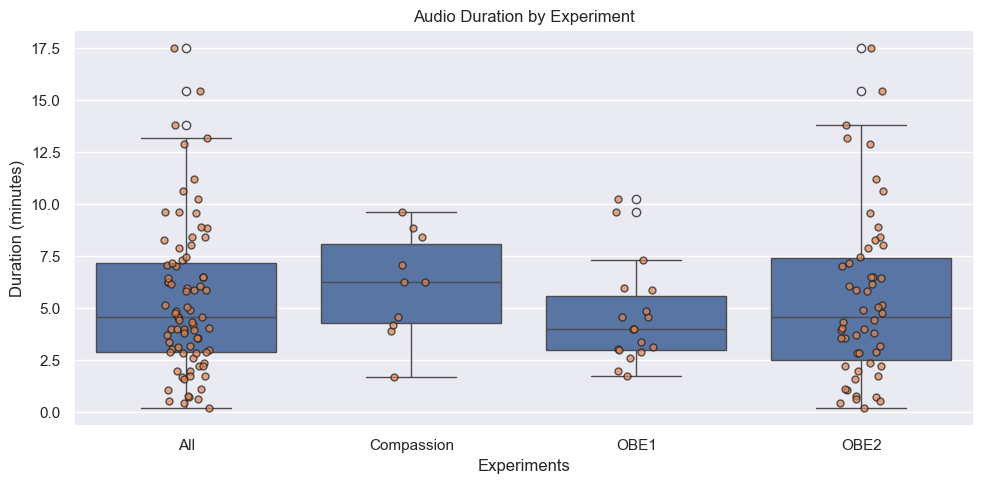

In [70]:
# Add a new row for the "All" category
df_all = df.copy()
df_all['Experiment'] = 'All'

# Concatenate the original data with the "All" data
df_combined = pd.concat([df_all, df])

# Add a new column for duration in minutes
df_combined['Duration_min'] = df_combined['Duration_sec'] / 60

# Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Experiment', y='Duration_min', data=df_combined)
sns.stripplot(x='Experiment', y='Duration_min', data=df_combined, alpha=0.7, edgecolor='k',linewidth=1)

# Set titles and labels
plt.title('Audio Duration by Experiment')
plt.xlabel('Experiments')
plt.ylabel('Duration (minutes)')

plt.tight_layout()
plt.show()

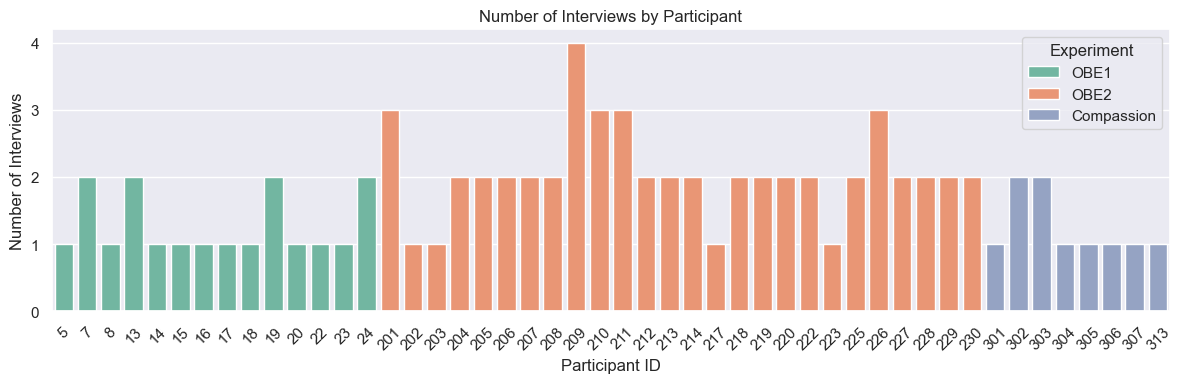

In [64]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Id', hue='Experiment', data=df, palette='Set2')

plt.title('Number of Interviews by Participant')
plt.xlabel('Participant ID')
plt.ylabel('Number of Interviews')
plt.xticks(rotation=45)
plt.legend(title='Experiment')
# Set y-axis to show only integers
plt.yticks(range(0, int(df['Id'].value_counts().max()) + 1))

plt.tight_layout()
#plt.savefig('interviews_by_participant.png', dpi=600)
plt.show()

In [72]:
# Count the number of file name per experiment
df_count = df.groupby('Experiment')['File Name'].nunique().reset_index()
df_count

,Experiment,File Name
0,Compassion,10
1,OBE1,18
2,OBE2,54


In [75]:
df_count.sum()

Experiment    CompassionOBE1OBE2
Id                            48
dtype: object

In [74]:
# Count the number of id per experiment
df_count = df.groupby('Experiment')['Id'].nunique().reset_index()
df_count

,Experiment,Id
0,Compassion,8
1,OBE1,14
2,OBE2,26


## Get the order of the conditions for each experiment (Meditation)

Final version, need to be completed & verified manually. 
- Done and actually located at ``interviews_corrected`` folder.

**C** : Control ; **I** : Intervention ; **1** : Only one interview ; **0** : No interview (eg. Set-up)

In [ ]:
df = pd.read_csv("outputs/audio_data.csv")
# Compassion
conditions_compassion = pd.read_csv("../data/Compassion/Compassion_orders.csv")
conditions_compassion["Id"] = conditions_compassion["Number"].apply(extract_id)
# If the first word is control -> CI, otherwise -> IC
conditions_compassion["Order_Condition"] = conditions_compassion["order"].apply(lambda x: "CI" if x.split()[0] == "control" else "IC")

# OBE2
conditions_obe2 = pd.read_excel("../Data/OBE2/Order_of_conditions.xlsx")
conditions_obe2["Id"] = conditions_obe2["Identification No."].apply(extract_id)
# CM -> CI, otherwise -> IC
conditions_obe2["Order_Condition"] = conditions_obe2["Order"].apply(lambda x: "CI" if x == "CM" else "IC")

# OBE1
conditions_obe1 = pd.read_csv("../Data/OBE1/order_OBE1.csv")
conditions_obe1["Id"] = conditions_obe1["subjID"]
conditions_obe1["Order_Condition"] = conditions_obe1["order"].apply(lambda x: "CI" if x == "CM" else "IC")

# Combine all conditions
conditions = pd.concat([conditions_compassion, conditions_obe2, conditions_obe1], ignore_index=True)
df = pd.merge(df, conditions[["Id","Order_Condition"]], on="Id", how="left")

# Create the 'Condition' column and set initial values to None
df["Condition"] = None
df = df.sort_values(by=['Id', 'File_name'])

def assign_condition(row):
    # Get rows for the same Id in any experiment
    id_group = df[df['Id'] == row['Id']]
    
    # If there is only one file for this Id, set Condition to "1"
    if len(id_group) == 1:
        return "1"
    
    # Assign 'Condition' based on alphabetical order in 'OBE2' and 'OBE1'
    if row['Experiment'] in ['OBE1', 'OBE2']  and len(id_group) == 2:
        if row.name == id_group.index[0]:
            return row['Order_Condition'][0]
        elif row.name == id_group.index[1]:
            return row['Order_Condition'][1]
    
    # For other cases, leave Condition as None
    return row['Condition']

# Apply the function to assign conditions
df['Condition'] = df.apply(assign_condition, axis=1)

# Select specific columns and save the final structured data
df = df[["Experiment", "File_name", "Id", "Duration", "Order_Condition", "Condition"]]

df.to_csv("outputs/structured_data.csv", index=False)
df

,Experiment,File_name,ID,Duration,Order_Condition,Condition
0,OBE1,ID 05,5,00:10:15,IC,1
15,OBE1,Id 7a,7,00:09:38,IC,I
16,OBE1,Id 7b,7,00:04:01,IC,C
1,OBE1,Id 08,8,00:04:34,CI,1
2,OBE1,Id 13,13,00:07:19,IC,I
...,...,...,...,...,...,...
77,Compassion,S304,304,00:07:05,CI,1
78,Compassion,S305con,305,00:01:41,CI,1
79,Compassion,S306,306,00:08:50,IC,1
80,Compassion,S307,307,00:06:15,CI,1


## Raw Audio Analysis (Grief)

In [76]:
directories = ["../data/Grief/eng","../data/Grief/fr"]
extensions = ["m4a","wav","mp4"]

df = analyze_audio_files(directories, extensions)

df.to_csv("outputs/GRIEF_audio_data.csv", index=False)
df

,File Name,Format,Id,Duration,Duration_timedelta,Duration_sec,Experiment
0,ADE_pilot_003_interview_04.10.24_part1,.wav,3,00:47:37,0 days 00:47:37.600000,2857.60,eng
1,ADE_pilot_003_interview_04.10.24_part2,.wav,3,00:21:00,0 days 00:21:00.380000,1260.38,eng
2,ADE_pilot_004_interview_15.10.24_part1,.wav,4,00:47:36,0 days 00:47:36.160000,2856.16,eng
3,ADE_pilot_004_interview_15.10.24_part2,.wav,4,00:12:27,0 days 00:12:27.260000,747.26,eng
4,ADE_pilot_005_interview_part1,.wav,5,00:47:35,0 days 00:47:35.680000,2855.68,eng
5,ADE_pilot_005_interview_part2,.wav,5,00:01:25,0 days 00:01:25.340000,85.34,eng
6,ADE_pilot_006_interview_30.10.24_part1,.wav,6,00:47:36,0 days 00:47:36.160000,2856.16,eng
7,ADE_pilot_006_interview_30.10.24_part2,.wav,6,00:12:07,0 days 00:12:07.580000,727.58,eng
8,ADE_pilot_007_interview_part1,.wav,7,00:47:36,0 days 00:47:36.640000,2856.64,eng
9,ADE_pilot_007_interview_part2,.wav,7,00:07:07,0 days 00:07:07.100000,427.10,eng


In [77]:
# Group by 'Experiment' and sum durations
print(df.groupby('Experiment')['Duration_timedelta'].sum())
print(df['Duration_timedelta'].sum())

Experiment
eng   0 days 08:45:59.040000
fr    0 days 02:31:20.340000
Name: Duration_timedelta, dtype: timedelta64[ns]
0 days 11:17:19.380000


In [91]:
len(df['Id'].unique())

11

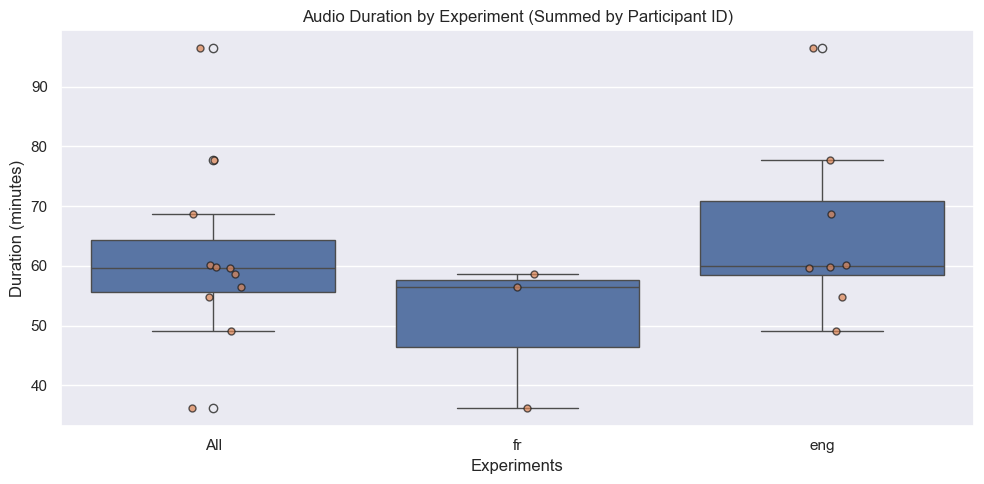

In [ ]:
df_summarized = df.groupby(['Id', 'Experiment'], as_index=False)['Duration_sec'].sum()

# Add a new column for duration in minutes
df_summarized['Duration_min'] = df_summarized['Duration_sec'] / 60

# Add a new row for the "All" category
df_summarized_all = df_summarized.copy()
df_summarized_all['Experiment'] = 'All'

# Combine the "All" data with the original data
df_combined = pd.concat([df_summarized_all,df_summarized])

# Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Experiment', y='Duration_min', data=df_combined)
sns.stripplot(x='Experiment', y='Duration_min', data=df_combined, alpha=0.7, edgecolor='k', linewidth=1)

# Set titles and labels
plt.title('Audio Duration by Experiment (Summed by Participant ID)')
plt.xlabel('Experiments')
plt.ylabel('Duration (minutes)')

plt.tight_layout()
plt.show()